# Predicting Customer Churn at Telco 


## Project Objectives:
- Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook report.

- Create modules (acquire.py, prepare.py) that make your process repeateable.

- Construct a model to predict customer churn using classification techniques.

## Project Goals: 
- Find drivers of churn at Telco using data from Codeup's SQL database
- Construct a ML classification model that accurately predicts customer churn 

## The Process:
- Acquire Data
- Prepare 
- Explore 
- Model & Evaluate
- Recommendations

# Data Acquisition
- Run imports
- Acquire data from the customers table from the `telco_churn` database on Codeup's Data Science database server using functions in acquire.py

In [4]:
#imports for project 
import numpy as np 
import pandas as pd
# visualize
import matplotlib.pyplot as plt
import seaborn as sns 
import graphviz
from graphviz import Graph
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")
# .py modules to acquire and prep the data
import acquire
import prepare
# hypothesis tests for data exploration
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
# train, validate, test
from sklearn.model_selection import train_test_split
# evaluating models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 
# creating models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression

### Data Summarization

In [142]:
#Acquire telco data
df = acquire.get_telco_data()
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check


In [6]:
#Get info  on dataframe to check columns,  data types, and check for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
#Check for missing values 
df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [8]:
#Summary statistics for each of the numeric values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
#Print number of rows and columns
df.shape

(7043, 24)

In [10]:
#Print names of columns
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

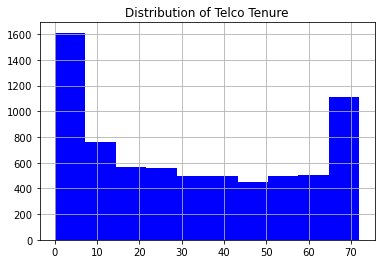

In [11]:
#Plot distributions of individual variables
df['tenure'].hist(color='blue')
plt.title('Distribution of Telco Tenure')
plt.show()

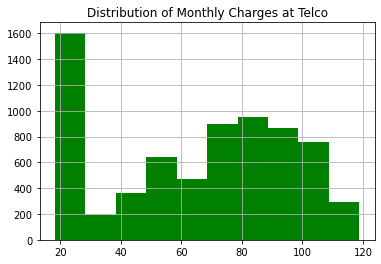

In [143]:
df['monthly_charges'].hist(color='green')

plt.title('Distribution of Monthly Charges at Telco')
plt.show()

### Findings
- Most columns that are strings/objects need to be converted to numerical variables for data exploration and modeling
- Some columns have "yes/no/no ___ service" variables which can be reduced to only "yes/no" and encoded
- Tenure is highest at the start of service
- Many customers pay around $20-30 monthly

# Data Preparation
- Use functions from prepare.py module to:
    - Split data into train/validate/test
    - Handle missing values
    - Encode variables
   


### Initial Cleanup

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [13]:
#set customer_id as first column
df = df.set_index('customer_id')

In [14]:
#shorten column names for readability: 
df = df.rename(columns={"payment_type_id": "payment_type", 
                        "internet_service_type_id": "internet_type",
                        "contract_type_id": "contract",
                        "senior_citizen": "senior", 
                        "phone_service": "phone", 
                        #set up payment_type column for encoding:
                        "payment_type": "auto_pay"})

### Encode columns with ""yes"/"no"/"no __ service" and change to numeric variables

In [15]:
#yes/no columns only
df.partner = df.partner.map({'No': 0, 'Yes': 1})
df.dependents = df.dependents.map({'No': 0, 'Yes': 1})
df.phone = df.phone.map({'No': 0, 'Yes': 1})
df.paperless_billing = df.paperless_billing.map({'No': 0, 'Yes': 1})
df.churn = df.churn.map({'No': 0, 'Yes': 1})

#yes/no/no___ columns (replace "no ___ service" with "no" before encoding)
df.multiple_lines = df.multiple_lines.replace('No Phone Service', 'No')
df.multiple_lines = df.multiple_lines.map({'No': 0, 'Yes': 1})

df.online_security = df.online_security.replace('No internet Service', 'No')
df.online_security = df.online_security.map({'No': 0, 'Yes': 1})

df.online_backup = df.online_backup.replace('No internet Service', 'No')
df.online_backup = df.online_backup.map({'No': 0, 'Yes': 1})

df.device_protection = df.device_protection.replace('No internet service', 'No')
df.device_protection = df.device_protection.map({'No': 0, 'Yes': 1})

df.tech_support = df.tech_support.replace('No internet service', 'No')
df.tech_support = df.tech_support.map({'No': 0, 'Yes': 1})

df.streaming_tv = df.streaming_tv.replace('No internet service', 'No')
df.streaming_tv = df.streaming_tv.map({'No': 0, 'Yes': 1})

df.streaming_movies = df.streaming_movies.replace('No internet service', 'No')
df.streaming_movies = df.streaming_movies.map({'No': 0, 'Yes': 1})

In [16]:
#Print data type for each column
df.dtypes

payment_type               int64
internet_type              int64
contract                   int64
gender                    object
senior                     int64
partner                    int64
dependents                 int64
tenure                     int64
phone                      int64
multiple_lines           float64
online_security          float64
online_backup            float64
device_protection          int64
tech_support               int64
streaming_tv               int64
streaming_movies           int64
paperless_billing          int64
monthly_charges          float64
total_charges             object
churn                      int64
contract_type             object
internet_service_type     object
auto_pay                  object
dtype: object

In [146]:
#Total charges appears to be an object when it should be a float. 
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')

In [18]:
#Customers with 0 tenure have NaN for total charges
#Let's get a sum of these missing values 
df.isnull().sum()

payment_type                0
internet_type               0
contract                    0
gender                      0
senior                      0
partner                     0
dependents                  0
tenure                      0
phone                       0
multiple_lines            682
online_security          1526
online_backup            1526
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges              11
churn                       0
contract_type               0
internet_service_type       0
auto_pay                    0
dtype: int64

In [19]:
#Replace missing values with 0. If tenure is 0, replace Total_Charges with 0. 
df.total_charges = df.total_charges.where((df.tenure != 0), 0)

In [20]:
#Check to see changes were made
df.isnull().sum()

payment_type                0
internet_type               0
contract                    0
gender                      0
senior                      0
partner                     0
dependents                  0
tenure                      0
phone                       0
multiple_lines            682
online_security          1526
online_backup            1526
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
auto_pay                    0
dtype: int64

In [21]:
# Creating dummy variables of gender
# Creates a data frame of gender dummy variables with male == 1 and female == 0
dummies = pd.get_dummies(df[['gender']], drop_first=True)
dummies.head()

,gender_Male
customer_id,
0003-MKNFE,1
0013-MHZWF,0
0015-UOCOJ,0
0023-HGHWL,1
0032-PGELS,0


In [22]:
# Add dummies to the original df
df = pd.concat([df,dummies], axis=1)
df.head()

,payment_type,internet_type,contract,gender,senior,partner,dependents,tenure,phone,multiple_lines,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,auto_pay,gender_Male
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,2,1,1,Male,0,0,0,9,1,1.0,...,0,1,0,59.9,542.40,0,Month-to-month,DSL,Mailed check,1
0013-MHZWF,4,1,1,Female,0,0,1,9,1,0.0,...,1,1,1,69.4,571.45,0,Month-to-month,DSL,Credit card (automatic),0
0015-UOCOJ,1,1,1,Female,1,0,0,7,1,0.0,...,0,0,1,48.2,340.35,0,Month-to-month,DSL,Electronic check,0
0023-HGHWL,1,1,1,Male,1,0,0,1,0,NaN,...,0,0,1,25.1,25.10,1,Month-to-month,DSL,Electronic check,1
0032-PGELS,3,1,1,Female,0,1,1,1,0,NaN,...,0,0,0,30.5,30.50,1,Month-to-month,DSL,Bank transfer (automatic),0


In [23]:
#adjust the new values for `contract_type` to be: 
    #0 = Month-to-Month
    #1 = One year
    #2 = Two Year
df.contract_type = df.contract_type.replace({'Month-to-month': 0, 
                                             'One year': 1, 
                                             'Two year': 2})

In [24]:
#adjust the new values for `internet_service_type` to be: 
    #0 = None
    #1 = DSL
    #2 = Fiber Optic
df.internet_service_type = df.internet_service_type.replace({'None': 0, 
                                                             'DSL': 1, 
                                                             'Fiber optic': 2})

In [25]:
#move payment_type column to auto_pay and adjust the new values to be: 
    #0 = Electronic check and Mailed check
    #1 = Bank transfer (automatic) and Credit card (automatic)
df.auto_pay = df.auto_pay.replace({'Electronic check': 0, 
                                   'Mailed check': 0, 
                                   'Bank transfer (automatic)': 1, 
                                   'Credit card (automatic)': 1})

In [26]:
#combine/create new features
df['streaming_services'] = df['streaming_tv'] + df['streaming_movies']
df['add_ons'] = df['online_security'] + df['online_backup'] + df['device_protection'] + df['tech_support']  

In [27]:
df = df.drop(columns=['payment_type', 'internet_type', 'contract', 'gender'])
df.head()

,senior,partner,dependents,tenure,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,auto_pay,gender_Male,streaming_services,add_ons
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,0,0,0,9,1,1.0,0.0,0.0,0,0,...,0,59.9,542.40,0,0,1,0,1,1,0.0
0013-MHZWF,0,0,1,9,1,0.0,0.0,0.0,0,1,...,1,69.4,571.45,0,0,1,1,0,2,1.0
0015-UOCOJ,1,0,0,7,1,0.0,1.0,0.0,0,0,...,1,48.2,340.35,0,0,1,0,0,0,1.0
0023-HGHWL,1,0,0,1,0,NaN,0.0,0.0,0,0,...,1,25.1,25.10,1,0,1,0,1,0,0.0
0032-PGELS,0,1,1,1,0,NaN,1.0,0.0,0,0,...,0,30.5,30.50,1,0,1,1,0,0,1.0


In [28]:
#`fillna` to fill missing numbers
df = df.fillna(0)

In [29]:
#dtypes show multiple lines, online security, and online backup as floats
#setting floats to integers
df.multiple_lines = df.multiple_lines.astype(int)
df.online_security = df.online_security.astype(int)
df.online_backup = df.online_backup.astype(int)

In [30]:
df.head()

,senior,partner,dependents,tenure,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,auto_pay,gender_Male,streaming_services,add_ons
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,0,0,0,9,1,1,0,0,0,0,...,0,59.9,542.40,0,0,1,0,1,1,0.0
0013-MHZWF,0,0,1,9,1,0,0,0,0,1,...,1,69.4,571.45,0,0,1,1,0,2,1.0
0015-UOCOJ,1,0,0,7,1,0,1,0,0,0,...,1,48.2,340.35,0,0,1,0,0,0,1.0
0023-HGHWL,1,0,0,1,0,0,0,0,0,0,...,1,25.1,25.10,1,0,1,0,1,0,0.0
0032-PGELS,0,1,1,1,0,0,1,0,0,0,...,0,30.5,30.50,1,0,1,1,0,0,1.0


# Data Exploration

In [31]:
#start from the top 
df = acquire.get_telco_data()

In [32]:
#grab cleaned df
df = prepare.clean_telco(df)

In [33]:
# Splitting data into train validate and split
train, validate, test = prepare.split(df, stratify_by='churn')

In [34]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 22)
validate -> (1691, 22)
test -> (1409, 22)


In [35]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [36]:
# lets check how many of our customers churn?
print(f'Number of customers that churn is: {train.churn.value_counts()[1]}')
print('')

print(f'Percentage of the customers that churn is: {train.churn.value_counts()[1]/len(train)*100}')

## Approximately 27 % of our customers churn

Number of customers that churn is: 1046

Percentage of the customers that churn is: 26.52802434694395


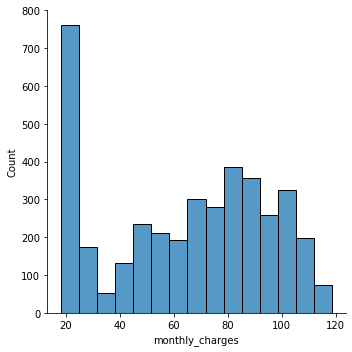

In [37]:
sns.displot(train, x=train.monthly_charges)


<AxesSubplot:xlabel='contract_type', ylabel='tenure'>

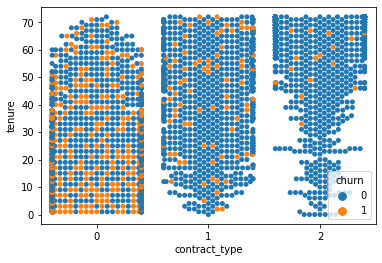

In [39]:
#Swarplot of different types of contracts and tenure with churn as hue
#0 = month-to-month, 1 = one year, 2 = two year
sns.swarmplot(x="contract_type", y="tenure", hue="churn", data=train,)
#month-to-month, one year, two year

<AxesSubplot:>

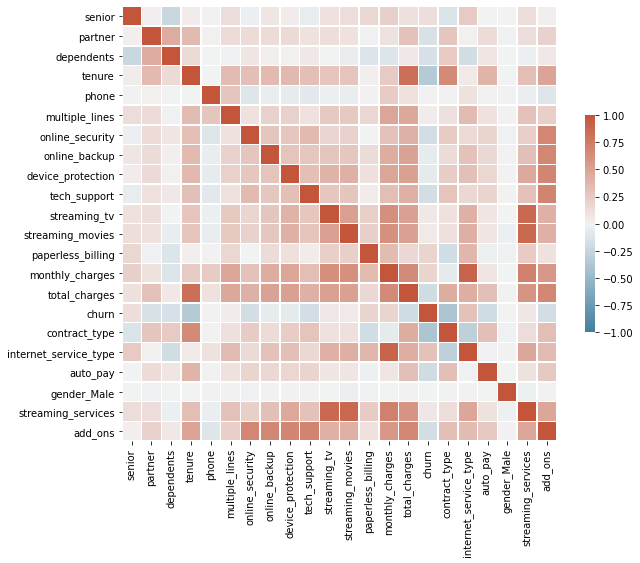

In [145]:
corr = train.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Hypothesis Testing 
- ran chi square tests to explore categorical data for Seniors, Tech Support, and Streaming Services
- set alpha to .05 
- Rejected the null for all

### Senior Citizens

Initial Hypothesis:

$H_0$ = Rate of churn is not dependent on being a senior citizen.

$H_a$ = Rate of churn is dependent on being a senior citizen.

Significance level $\alpha$ = 0.05

<AxesSubplot:xlabel='senior', ylabel='count'>

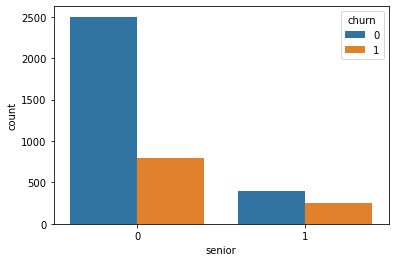

In [43]:
#visualize senior citizens that churn
sns.countplot(data=train, x='senior', hue="churn")

In [44]:
# Seniors and churn are two categorical features
# I'll use chi-square test for this. 

# Set alpha 
alpha = .05

# create a cross table
table = pd.crosstab(train.senior, train.churn)
table

churn,0,1
senior,,
0,2502,797
1,395,249


In [45]:
chi2, p, degf, expected = chi2_contingency(table)
print(expected)
print(f"p: {p}")

[[2423.84047679  875.15952321]
 [ 473.15952321  170.84047679]]
p: 3.506345408511119e-14


In [46]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Tech Support 

Initial Hypothesis:

$H_0$ = Rate of churn is not dependent on having tech support.

$H_a$ = Rate of churn is dependent on having tech support.

Significance level $\alpha$ = 0.05

<AxesSubplot:xlabel='tech_support', ylabel='count'>

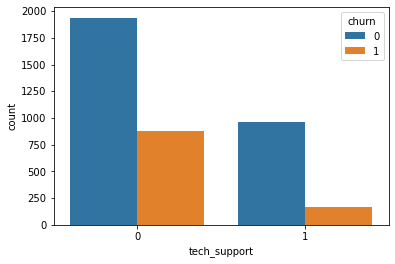

In [47]:
#visualize customers with tech support who churn
sns.countplot(data=train, x='tech_support', hue="churn")

In [48]:
# Tech support and churn are two categorical features
# I'll use chi-square test for this. 

# Set alpha 
alpha = .05

# create a cross table
table = pd.crosstab(train.tech_support, train.churn)
table

churn,0,1
tech_support,,
0,1937,880
1,960,166


In [49]:
chi2, p, degf, expected = chi2_contingency(table)
print(expected)
print(f"p: {p}")

[[2069.70555415  747.29444585]
 [ 827.29444585  298.70555415]]
p: 4.6583107799676056e-26


In [50]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Streaming Services 

Initial Hypothesis:

$H_0$ = Rate of churn is not dependent on having streaming services.

$H_a$ = Rate of churn is dependent on having streaming services.

Significance level $\alpha$ = 0.05

<AxesSubplot:xlabel='streaming_services', ylabel='count'>

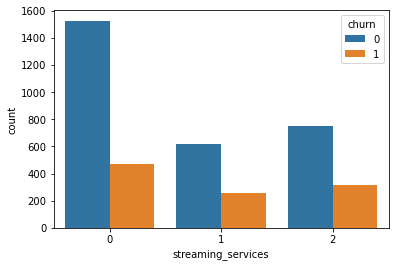

In [136]:
#visualize customers with tech support who churn
sns.countplot(data=train, x='streaming_services', hue="churn")

In [138]:
# I'll use chi-square test for this. 

# Set alpha 
alpha = .05

# create a cross table
table = pd.crosstab(train.streaming_services, train.churn)
table

churn,0,1
streaming_services,,
0,1526,469
1,617,258
2,754,319


In [139]:
chi2, p, degf, expected = chi2_contingency(table)
print(expected)
print(f"p: {p}")

[[1465.76591428  529.23408572]
 [ 642.87978696  232.12021304]
 [ 788.35429876  284.64570124]]
p: 7.863892191181882e-05


In [140]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


# Modeling and Evaluation
- Establish a baseline accuracy to determine if having a model is better than no model and train and compare 3 different models

- Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters you use.

- Compare evaluation metrics across all the models you train and select the ones you want to evaluate using your validate dataframe.

- Based on the evaluation of your models using the train and validate datasets, choose your best model that you will try with your test data, once.

- Test the final model on your out-of-sample data (the testing dataset), summarize the performance, interpret and document your results.

### The Process: 
- Set up X inputs and y target variable for each split: Train, Validate, Test
- Establish Baseline: accuracy was 73% 
- Ran Random Forest, K Nearest Neighbor, and Logistic Regression 
- First ran on all features, then ran second set of these tests on select features: seniors, tech support, and streaming services

In [51]:
# Set up X inputs and y target variable for each split
#Train
X_train = train.drop(columns=['churn'])
y_train = train.churn

#Validate
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

#Test
X_test = test.drop(columns=['churn'])
y_test = test.churn

###  Baseline Accuracy 

In [52]:
# Most of our customers are still with the company (0 = has not churned)
y_train.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [53]:
#baseline model would be to predict 0 since more customers don't churn 
#baseline accuracy:
baseline_accuracy = (train.churn == 0).mean()

print(f'baseline accuracy: {baseline_accuracy: .2}')

baseline accuracy:  0.73


### Decision Tree 

In [55]:
#create 1st Decision Tree model (specifying max_depth argument to avoid overfitting, all features) and compare to baseline
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model
clf1.fit(X_train, y_train)

#get predictions from model
y_pred = clf1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))

Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st Decision Tree classifier on training set: 0.79


In [89]:
#create 2nd decision tree model (specifying max_depth argument and features)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=123)

#specify the features we're using 
features = ["senior", "tech_support", "streaming_services"]

#fit model using only specified features
clf2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = clf2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))
print("--------------------------------------------------------------")

print("2nd Model specifying senior, streaming services, and tech support:")
print('Accuracy on training set: {:.2f}'
     .format(clf2.score(X_train[features], y_train)))

Accuracy of 1st Decision Tree classifier on training set: 0.79
--------------------------------------------------------------
2nd Model specifying senior, streaming services, and tech support:
Accuracy on training set: 0.73


### Random Forest

In [77]:
#create 1st random forest model (specifying max_depth and min_samples_leaf parameters to avoid overfitting, all features) and compare to baseline
rf1 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

#fit model
rf1 = rf1.fit(X_train, y_train)

#get predictions from model
y_pred = rf1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Random Forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))


Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st Random Forest classifier on training set: 0.90


In [83]:
#create 2nd random forest model (specifying max_depth/min_samples_leaf argument and features)
rf2 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

#specify the features we're using 
features = ["senior", "tech_support", "streaming_services"]
#fit model using only specified features
rf2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = rf2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st Random Forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))
print("---------------------------------------------------------------")

print("2nd Model specifying senior, tech support, and streaming services:")
print('Accuracy on training set: {:.2f}'
     .format(rf2.score(X_train[features], y_train)))

Accuracy of 1st Random Forest classifier on training set: 0.90
---------------------------------------------------------------
2nd Model specifying senior, tech support, and streaming services:
Accuracy on training set: 0.73


### K-Nearest Neighbor (KNN)

In [60]:
#create 1st knn model (default parameters, all features) and compare to baseline
knn1 = KNeighborsClassifier()

#fit model
knn1 = knn1.fit(X_train, y_train)

#get predictions from model
y_pred = knn1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st KNN classifier on training set: 0.83


In [91]:
#create 2nd knn model (specifying features)
knn2 = KNeighborsClassifier()

#specify the features we're using 
features = ["senior", "streaming_services", "tech_support"]

#fit model using only specified features
knn2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = knn2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print("----------------------------------------------------")

print("2nd Model specifying senior, streaming services, and tech support:")
print('Accuracy on training set: {:.2f}'
     .format(knn2.score(X_train[features], y_train)))

Accuracy of 1st KNN classifier on training set: 0.83
----------------------------------------------------
2nd Model specifying senior, streaming services, and tech support:
Accuracy on training set: 0.72


### Logistic Regression 

In [65]:
#create 1st logistic regression model (default parameters, all features) and compare to baseline
logit1 = LogisticRegression(random_state=123)

#fit model
logit1.fit(X_train, y_train)

#get predictions from model
y_pred = logit1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st Logistic Regression classifier on training set: 0.80


In [92]:
#create 2nd logistic regression model (default parameters, specifying features) and compare to baseline
logit2 = LogisticRegression(random_state=123)

#specify the features we're using 
features = ["senior", "tech_support", "streaming_services"]

#fit model using only specified features
logit2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = logit2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))
print("---------------------------------------------------------------")
print("2nd Model specifying senior, tech support, and streaming services")
print('Accuracy on training set: {:.2f}'
     .format(logit2.score(X_train[features], y_train)))

Accuracy of 1st Logistic Regression classifier on training set: 0.80
---------------------------------------------------------------
2nd Model specifying senior, tech support, and streaming services
Accuracy on training set: 0.73


### Findings:
- There is value in continuing to create new models because each classification model (using all features) beat the baseline.
- There is a decrease on training data's accuracy from the 1st model to the 2nd model, which probably means that specifying certain features are not good predictors of target variable.

### Use best train models to compare to validate dataset
- 2nd Random Forest model using all features 
- 2nd K-Nearest Neighbor model using all features
- 2nd Logistic Regression model using all features 

### Validate
- Findings on KNN and Random Forest accuracy same on train and validate data sets 73%
- Accuracy of 2nd Logistic Regression using seniors, tech support, and streaming services features  training set was 74% which is slightly better than the baseline, so I decided to use this for test.

In [93]:
#2nd random forest model

features = ["senior", "tech_support", "streaming_services"]
#evaluate on validate sample
y_pred = rf2.predict(X_validate[features])

#compare train to validate
print('Accuracy of 2nd Random Forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train[features], y_train)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd Random Forest classifier on training set: 0.73
--------------------------------------------------------------
Random Forest classifier on validate set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1242
           1       0.00      0.00      0.00       449

    accuracy                           0.73      1691
   macro avg       0.37      0.50      0.42      1691
weighted avg       0.54      0.73      0.62      1691



In [94]:
#2nd knn model
#specify the features we're using 
features = ["senior", "tech_support", "streaming_services"]

#evaluate on validate sample
y_pred = knn2.predict(X_validate[features])

#compare train to validate
print('Accuracy of 2nd KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train[features], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd KNN classifier on training set: 0.73
--------------------------------------------------------------
KNN classifier on validate set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1242
           1       0.00      0.00      0.00       449

    accuracy                           0.73      1691
   macro avg       0.37      0.50      0.42      1691
weighted avg       0.54      0.73      0.62      1691



In [95]:
#Logisitic Regression 
#specify the features we're using 
features = ["senior", "tech_support", "streaming_services"]
#evaluate on validate sample w/ specified features
y_pred = logit2.predict(X_validate[features])
#compare train to validate
print('Accuracy of 2nd Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train[features], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd Logistic Regression classifier on training set: 0.73
--------------------------------------------------------------
Logistic Regression classifier on validate set:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      1242
           1       0.51      0.08      0.14       449

    accuracy                           0.74      1691
   macro avg       0.63      0.53      0.49      1691
weighted avg       0.68      0.74      0.66      1691



In [96]:
# findings on KNN and Random Forest accuracy same on train and validate data sets
# 2nd logistic regression model accuracy up +1 - will use this model to test final 

## Test - Final Model 
- Once again used senior, tech_support, and streaming_services as features
- used Logistic Regression with an accuracy of 74% which was slightly better than baseline. 

In [97]:
#Test Final Model 
features = ["senior", "tech_support", "streaming_services"]

y_pred_test = logit2.predict(X_test[features])

print("Test Performance: Logistic Regression")

print('Accuracy of Logistic Regression model with senior, tech support, and streaming services: {:.4f}'.format(logit2.score(X_test[features], y_test)))

print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Test Performance: Logistic Regression
Accuracy of Logistic Regression model with senior, tech support, and streaming services: 0.7360
[[1007   28]
 [ 344   30]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      1035
           1       0.52      0.08      0.14       374

    accuracy                           0.74      1409
   macro avg       0.63      0.53      0.49      1409
weighted avg       0.68      0.74      0.66      1409



## Key Takeaways/Findings

## CSV
- convert model to CSV file with customer_id, probability of churn, and prediction of churn (1 = churn, 0 = not_churn)

In [127]:
output = logit2.predict_proba(X_test[features])
output = pd.DataFrame(output)
output.head()

,0,1
0,0.748849,0.251151
1,0.902424,0.097576
2,0.748849,0.251151
3,0.632722,0.367278
4,0.686424,0.313576


In [128]:
#rename columns
output.columns=["ProbabilityNoChurn", "ProbabilityChurn"]

In [129]:
output.index = X_test.index

In [130]:
output.head(3)

,ProbabilityNoChurn,ProbabilityChurn
customer_id,,
3420-YJLQT,0.748849,0.251151
6543-JXSOO,0.902424,0.097576
5577-OTWWW,0.748849,0.251151


In [131]:
y_pred_test = logit2.predict(X_test[features])

In [133]:
#create new column w/ predictions from test data
output["prediction"] = y_pred_test
output.head()

,ProbabilityNoChurn,ProbabilityChurn,prediction
customer_id,,,
3420-YJLQT,0.748849,0.251151,0
6543-JXSOO,0.902424,0.097576,0
5577-OTWWW,0.748849,0.251151,0
6646-JPPHA,0.632722,0.367278,0
5759-RCVCB,0.686424,0.313576,0


In [134]:
#generate csv 
output.to_csv("predictions.csv")